# Delivery Date Prediction

## Problem Definition

In the visualization before, we can see that we can't predict the delivery time properly and caused less customer satisfaction. In this case, we want to remodel the estimated time delivery using some models.

### Import Library

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [2]:
df_customers = pd.read_csv("https://gist.githubusercontent.com/Kaniku/6dd21d0ebf13f47aa021a303ef31692a/raw/38cee16f1a973d21ea2d4c12956a7bc3be4c33ab/dim_customer.csv")
df_sellers = pd.read_csv("https://gist.githubusercontent.com/Kaniku/fe0c61ae0dcb59165fd04bc98ec7dc53/raw/fe04980e49eaa873094f383556eeecbbf41f53b8/dim_seller.csv")
df_orders = pd.read_csv("https://gist.githubusercontent.com/Kaniku/2fb2bc8446c6f198691036a134d9def9/raw/078548028dedfdbd28ef9f09147255e3d82ce583/fact_order.csv")
df_products = pd.read_csv("https://gist.githubusercontent.com/Kaniku/0d6c248b6b11e5c4700a326ba7b93724/raw/5137aee7b5f9991af72a4939d5ee090512ce791d/dim_products.csv")

### Overview Data

In [3]:
df_customers.head()

,customer_key,user_name,customer_zip_code,customer_city,customer_state
0,1,0c1a20644f0dc126c3eaff8dbc1bd12c,1003,KOTA TANGERANG,BANTEN
1,2,968f6d2f674977d88a4b445a5117ccd8,1004,KOTA TANGERANG,BANTEN
2,3,095e7c124c5c1ccb1eb9f731152eae6a,1004,KOTA TANGERANG,BANTEN
3,4,84a7776f914ff19505e44effba86455f,1005,KOTA TANGERANG,BANTEN
4,5,ded4351942c7fc292b88e5b090af2b46,1005,KOTA TANGERANG,BANTEN


In [4]:
df_sellers.head()

,seller_key,seller_id,seller_zip_code,seller_city,seller_state
0,0,0,0,UNKNOWN,UNKNOWN
1,1,0015a82c2db000af6aaaf3ae2ecb0532,9080,KABUPATEN BOGOR,JAWA BARAT
2,2,001cca7ae9ae17fb1caed9dfb1094831,29156,KOTA PEMATANG SIANTAR,SUMATERA UTARA
3,3,001e6ad469a905060d959994f1b41e4f,24754,KOTA DENPASAR,BALI
4,4,002100f778ceb8431b7a1020ff7ab48f,14405,KABUPATEN PEKALONGAN,JAWA TENGAH


In [5]:
df_orders.head()

,order_id,order_item_id,product_key,seller_key,customer_key,feedback_key,order_status,pickup_limit_date_key,pickup_limit_time_key,order_date_key,order_time_key,order_approved_date_key,order_approved_time_key,pickup_date_key,pickup_time_key,delivered_date_key,delivered_time_key,estimated_time_delivery_date_key,estimated_time_delivery_time_key,price,shipping_cost,total_payment,count_blipay,total_blipay,count_credit_card,total_credit_card,count_debit_card,total_debit_card,count_voucher,total_voucher,count_not_defined,total_not_defined,total_payment_sequential,total_payment_installments,total_payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,1,17418,631,4257,26718,DELIVERED,20171006.0,40035.0,20171002,39393,20171002.0,40035.0,20171004.0,71700.0,20171010.0,77113.0,20171018,0,29990.0,8720.0,38710.0,0,0.0,1,18120.0,0,0.0,2,20590.0,0,0.0,3,3,38710.0
1,53cdb2fc8bc7dce0b6741e2150273451,1,11599,478,68741,91382,DELIVERED,20180730.0,12267.0,20180724,74497,20180726.0,12267.0,20180726.0,52260.0,20180807.0,55665.0,20180813,0,118700.0,22760.0,141460.0,1,141460.0,0,0.0,0,0.0,0,0.0,0,0.0,1,1,141460.0
2,47770eb9100c2d0c44946d9cf07ec65d,1,21799,858,79554,95354,DELIVERED,20180813.0,32123.0,20180808,31129,20180808.0,32123.0,20180808.0,49800.0,20180817.0,65189.0,20180904,0,159900.0,19220.0,179120.0,0,0.0,1,179120.0,0,0.0,0,0.0,0,0.0,1,3,179120.0
3,949d5b44dbf5de918fe9c16f97b45f8a,1,26906,1254,72322,35253,DELIVERED,20171123.0,71159.0,20171118,70086,20171118.0,71159.0,20171122.0,49199.0,20171202.0,1722.0,20171215,0,45000.0,27200.0,72200.0,0,0.0,1,72200.0,0,0.0,0,0.0,0,0.0,1,1,72200.0
4,ad21c59c0840e6cb83a9ceb5573f8159,1,13061,528,20986,51798,DELIVERED,20180219.0,73897.0,20180213,76719,20180213.0,80429.0,20180214.0,71194.0,20180216.0,65822.0,20180226,0,19900.0,8720.0,28620.0,0,0.0,1,28620.0,0,0.0,0,0.0,0,0.0,1,1,28620.0


In [6]:
df_products.head()

,product_key,product_id,product_category,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_volume_cm3
0,0,0,UNKNOWN,0.0,0.0,0.0,0.0,0.0
1,1,00066f42aeeb9f3007548bb9d3f33c38,PERFUMERY,53.0,596.0,6.0,300.0,5120.0
2,2,00088930e925c41fd95ebfe695fd2655,AUTO,56.0,752.0,4.0,1225.0,14300.0
3,3,0009406fd7479715e4bef61dd91f2462,BED BATH TABLE,50.0,266.0,2.0,300.0,23625.0
4,4,000b8f95fcb9e0096488278317764d19,HOUSEWARES,25.0,364.0,3.0,550.0,5472.0


In [7]:
print('Information of Customers: '), df_customers.info()
print('Information of Sellers: '), df_sellers.info()
print('Information of Orders: '), df_orders.info()
print('Information of Products: '), df_products.info()

Information of Customers: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96096 entries, 0 to 96095
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_key       96096 non-null  int64 
 1   user_name          96096 non-null  object
 2   customer_zip_code  96096 non-null  int64 
 3   customer_city      96096 non-null  object
 4   customer_state     96096 non-null  object
dtypes: int64(2), object(3)
memory usage: 3.7+ MB
Information of Sellers: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3096 entries, 0 to 3095
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   seller_key       3096 non-null   int64 
 1   seller_id        3096 non-null   object
 2   seller_zip_code  3096 non-null   int64 
 3   seller_city      3096 non-null   object
 4   seller_state     3096 non-null   object
dtypes: int64(2), object(3)
memory usage

(None, None)

In [8]:
#Total row and column
print('Total row and column of customers: ', df_customers.shape)
print('Total row and column of sellers: ', df_sellers.shape)
print('Total row and column of order: ', df_orders.shape)
print('Total row and column of products: ', df_products.shape)

Total row and column of customers:  (96096, 5)
Total row and column of sellers:  (3096, 5)
Total row and column of order:  (113425, 35)
Total row and column of products:  (32952, 8)


### Get Delivery Distance

#### Get the seller zip code of each order

In [9]:
orders_sellers = pd.merge(df_orders, df_sellers, on = 'seller_key', how = 'left')

In [10]:
orders_sellers

,order_id,order_item_id,product_key,seller_key,customer_key,feedback_key,order_status,pickup_limit_date_key,pickup_limit_time_key,order_date_key,order_time_key,order_approved_date_key,order_approved_time_key,pickup_date_key,pickup_time_key,delivered_date_key,delivered_time_key,estimated_time_delivery_date_key,estimated_time_delivery_time_key,price,shipping_cost,total_payment,count_blipay,total_blipay,count_credit_card,total_credit_card,count_debit_card,total_debit_card,count_voucher,total_voucher,count_not_defined,total_not_defined,total_payment_sequential,total_payment_installments,total_payment_value,seller_id,seller_zip_code,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,1,17418,631,4257,26718,DELIVERED,20171006.0,40035.0,20171002,39393,20171002.0,40035.0,20171004.0,71700.0,20171010.0,77113.0,20171018,0,29990.0,8720.0,38710.0,0,0.0,1,18120.0,0,0.0,2,20590.0,0,0.0,3,3,38710.0,3504c0cb71d7fa48d967e0e4c94d59d9,9350,KABUPATEN CILACAP,JAWA TENGAH
1,53cdb2fc8bc7dce0b6741e2150273451,1,11599,478,68741,91382,DELIVERED,20180730.0,12267.0,20180724,74497,20180726.0,12267.0,20180726.0,52260.0,20180807.0,55665.0,20180813,0,118700.0,22760.0,141460.0,1,141460.0,0,0.0,0,0.0,0,0.0,0,0.0,1,1,141460.0,289cdb325fb7e7f891c38608bf9e0962,31570,KABUPATEN PAMEKASAN,JAWA TIMUR
2,47770eb9100c2d0c44946d9cf07ec65d,1,21799,858,79554,95354,DELIVERED,20180813.0,32123.0,20180808,31129,20180808.0,32123.0,20180808.0,49800.0,20180817.0,65189.0,20180904,0,159900.0,19220.0,179120.0,0,0.0,1,179120.0,0,0.0,0,0.0,0,0.0,1,3,179120.0,4869f7a5dfa277a7dca6462dcf3b52b2,14840,KABUPATEN LUWU TIMUR,SULAWESI SELATAN
3,949d5b44dbf5de918fe9c16f97b45f8a,1,26906,1254,72322,35253,DELIVERED,20171123.0,71159.0,20171118,70086,20171118.0,71159.0,20171122.0,49199.0,20171202.0,1722.0,20171215,0,45000.0,27200.0,72200.0,0,0.0,1,72200.0,0,0.0,0,0.0,0,0.0,1,1,72200.0,66922902710d126a0e7d26b0e3805106,31842,KABUPATEN TANGERANG,BANTEN
4,ad21c59c0840e6cb83a9ceb5573f8159,1,13061,528,20986,51798,DELIVERED,20180219.0,73897.0,20180213,76719,20180213.0,80429.0,20180214.0,71194.0,20180216.0,65822.0,20180226,0,19900.0,8720.0,28620.0,0,0.0,1,28620.0,0,0.0,0,0.0,0,0.0,1,1,28620.0,2c9e548be18521d1c43cde1c582c6de8,8752,KABUPATEN BANDUNG BARAT,JAWA BARAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,ffecd5a79a0084f6a592288c67e3c298,2,10514,1709,66908,60042,DELIVERED,20180305.0,72927.0,20180227,72025,20180227.0,72927.0,20180228.0,75292.0,20180329.0,52625.0,20180322,0,21900.0,15790.0,37690.0,0,0.0,1,113070.0,0,0.0,0,0.0,0,0.0,1,1,113070.0,8b321bb669392f5163d04c59e235e066,1212,KOTA TANGERANG,BANTEN
113421,fff8287bbae429a99bb7e8c21d151c41,1,24532,948,71730,65044,DELIVERED,20180327.0,44962.0,20180317,43905,20180317.0,44962.0,20180321.0,69745.0,20180407.0,36468.0,20180419,0,180000.0,48140.0,228140.0,0,0.0,1,456280.0,0,0.0,0,0.0,0,0.0,1,4,456280.0,4e922959ae960d389249c378d1c939f5,12327,KABUPATEN BOJONEGORO,JAWA TIMUR
113422,fffb9224b6fc7c43ebb0904318b10b5f,1,8761,2138,71101,32171,DELIVERED,20171103.0,10558.0,20171027,60660,20171028.0,10558.0,20171110.0,70312.0,20171117.0,70902.0,20171127,0,55000.0,34190.0,89190.0,1,356760.0,0,0.0,0,0.0,0,0.0,0,0.0,1,1,356760.0,b1fc4f64df5a0e8b6913ab38803c57a9,24440,KOTA DENPASAR,BALI
113423,fffb9224b6fc7c43ebb0904318b10b5f,2,8761,2138,71101,32171,DELIVERED,20171103.0,10558.0,20171027,60660,20171028.0,10558.0,20171110.0,70312.0,20171117.0,70902.0,20171127,0,55000.0,34190.0,89190.0,1,356760.0,0,0.0,0,0.0,0,0.0,0,0.0,1,1,356760.0,b1fc4f64df5a0e8b6913ab38803c57a9,24440,KOTA DENPASAR,BALI


In [11]:
orders_join = pd.merge(orders_sellers, df_customers, on = 'customer_key', how = 'left')

In [12]:
orders_join.head()

,order_id,order_item_id,product_key,seller_key,customer_key,feedback_key,order_status,pickup_limit_date_key,pickup_limit_time_key,order_date_key,order_time_key,order_approved_date_key,order_approved_time_key,pickup_date_key,pickup_time_key,delivered_date_key,delivered_time_key,estimated_time_delivery_date_key,estimated_time_delivery_time_key,price,shipping_cost,total_payment,count_blipay,total_blipay,count_credit_card,total_credit_card,count_debit_card,total_debit_card,count_voucher,total_voucher,count_not_defined,total_not_defined,total_payment_sequential,total_payment_installments,total_payment_value,seller_id,seller_zip_code,seller_city,seller_state,user_name,customer_zip_code,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,1,17418,631,4257,26718,DELIVERED,20171006.0,40035.0,20171002,39393,20171002.0,40035.0,20171004.0,71700.0,20171010.0,77113.0,20171018,0,29990.0,8720.0,38710.0,0,0.0,1,18120.0,0,0.0,2,20590.0,0,0.0,3,3,38710.0,3504c0cb71d7fa48d967e0e4c94d59d9,9350,KABUPATEN CILACAP,JAWA TENGAH,7c396fd4830fd04220f754e42b4e5bff,3149,KOTA TANGERANG,BANTEN
1,53cdb2fc8bc7dce0b6741e2150273451,1,11599,478,68741,91382,DELIVERED,20180730.0,12267.0,20180724,74497,20180726.0,12267.0,20180726.0,52260.0,20180807.0,55665.0,20180813,0,118700.0,22760.0,141460.0,1,141460.0,0,0.0,0,0.0,0,0.0,0,0.0,1,1,141460.0,289cdb325fb7e7f891c38608bf9e0962,31570,KABUPATEN PAMEKASAN,JAWA TIMUR,af07308b275d755c9edb36a90c618231,47813,KABUPATEN BATANG HARI,JAMBI
2,47770eb9100c2d0c44946d9cf07ec65d,1,21799,858,79554,95354,DELIVERED,20180813.0,32123.0,20180808,31129,20180808.0,32123.0,20180808.0,49800.0,20180817.0,65189.0,20180904,0,159900.0,19220.0,179120.0,0,0.0,1,179120.0,0,0.0,0,0.0,0,0.0,1,3,179120.0,4869f7a5dfa277a7dca6462dcf3b52b2,14840,KABUPATEN LUWU TIMUR,SULAWESI SELATAN,3a653a41f6f9fc3d2a113cf8398680e8,75265,KABUPATEN OGAN KOMERING ULU,SUMATERA SELATAN
3,949d5b44dbf5de918fe9c16f97b45f8a,1,26906,1254,72322,35253,DELIVERED,20171123.0,71159.0,20171118,70086,20171118.0,71159.0,20171122.0,49199.0,20171202.0,1722.0,20171215,0,45000.0,27200.0,72200.0,0,0.0,1,72200.0,0,0.0,0,0.0,0,0.0,1,1,72200.0,66922902710d126a0e7d26b0e3805106,31842,KABUPATEN TANGERANG,BANTEN,7c142cf63193a1473d2e66489a9ae977,59296,KABUPATEN SOPPENG,SULAWESI SELATAN
4,ad21c59c0840e6cb83a9ceb5573f8159,1,13061,528,20986,51798,DELIVERED,20180219.0,73897.0,20180213,76719,20180213.0,80429.0,20180214.0,71194.0,20180216.0,65822.0,20180226,0,19900.0,8720.0,28620.0,0,0.0,1,28620.0,0,0.0,0,0.0,0,0.0,1,1,28620.0,2c9e548be18521d1c43cde1c582c6de8,8752,KABUPATEN BANDUNG BARAT,JAWA BARAT,72632f0f9dd73dfee390c9b22eb56dd6,9195,KABUPATEN BOGOR,JAWA BARAT


### Clean Orders

Filter out orders with multiple sellers
Because each order only has one delivery date

In [13]:
df = orders_join.groupby('order_id').nunique()

In [14]:
df

,order_item_id,product_key,seller_key,customer_key,feedback_key,order_status,pickup_limit_date_key,pickup_limit_time_key,order_date_key,order_time_key,order_approved_date_key,order_approved_time_key,pickup_date_key,pickup_time_key,delivered_date_key,delivered_time_key,estimated_time_delivery_date_key,estimated_time_delivery_time_key,price,shipping_cost,total_payment,count_blipay,total_blipay,count_credit_card,total_credit_card,count_debit_card,total_debit_card,count_voucher,total_voucher,count_not_defined,total_not_defined,total_payment_sequential,total_payment_installments,total_payment_value,seller_id,seller_zip_code,seller_city,seller_state,user_name,customer_zip_code,customer_city,customer_state
order_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
00018f77f2f0320c557190d7a144bdd3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
000229ec398224ef6ca0657da4fc703e,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
00024acbcdf0a6daa1e931b038114c75,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
00042b26cf59d7ce69dfabb4e55b4fd9,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
fffcd46ef2263f404302a634eb57f7eb,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
fffce4705a9662cd70adb13d4a31832d,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [15]:
single_order = pd.Series(df[df['seller_key'] == 1].index)

In [16]:
single_order

0        00010242fe8c5a6d1ba2dd792cb16214
1        00018f77f2f0320c557190d7a144bdd3
2        000229ec398224ef6ca0657da4fc703e
3        00024acbcdf0a6daa1e931b038114c75
4        00042b26cf59d7ce69dfabb4e55b4fd9
                       ...               
98158    fffc94f6ce00a00581880bf54a75a037
98159    fffcd46ef2263f404302a634eb57f7eb
98160    fffce4705a9662cd70adb13d4a31832d
98161    fffe18544ffabc95dfada21779c9644f
98162    fffe41c64501cc87c801fd61db3f6244
Name: order_id, Length: 98163, dtype: object

In [17]:
filtered_orders = pd.merge(orders_join, single_order, how = 'inner')

In [18]:
filtered_orders

,order_id,order_item_id,product_key,seller_key,customer_key,feedback_key,order_status,pickup_limit_date_key,pickup_limit_time_key,order_date_key,order_time_key,order_approved_date_key,order_approved_time_key,pickup_date_key,pickup_time_key,delivered_date_key,delivered_time_key,estimated_time_delivery_date_key,estimated_time_delivery_time_key,price,shipping_cost,total_payment,count_blipay,total_blipay,count_credit_card,total_credit_card,count_debit_card,total_debit_card,count_voucher,total_voucher,count_not_defined,total_not_defined,total_payment_sequential,total_payment_installments,total_payment_value,seller_id,seller_zip_code,seller_city,seller_state,user_name,customer_zip_code,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,1,17418,631,4257,26718,DELIVERED,20171006.0,40035.0,20171002,39393,20171002.0,40035.0,20171004.0,71700.0,20171010.0,77113.0,20171018,0,29990.0,8720.0,38710.0,0,0.0,1,18120.0,0,0.0,2,20590.0,0,0.0,3,3,38710.0,3504c0cb71d7fa48d967e0e4c94d59d9,9350,KABUPATEN CILACAP,JAWA TENGAH,7c396fd4830fd04220f754e42b4e5bff,3149,KOTA TANGERANG,BANTEN
1,53cdb2fc8bc7dce0b6741e2150273451,1,11599,478,68741,91382,DELIVERED,20180730.0,12267.0,20180724,74497,20180726.0,12267.0,20180726.0,52260.0,20180807.0,55665.0,20180813,0,118700.0,22760.0,141460.0,1,141460.0,0,0.0,0,0.0,0,0.0,0,0.0,1,1,141460.0,289cdb325fb7e7f891c38608bf9e0962,31570,KABUPATEN PAMEKASAN,JAWA TIMUR,af07308b275d755c9edb36a90c618231,47813,KABUPATEN BATANG HARI,JAMBI
2,47770eb9100c2d0c44946d9cf07ec65d,1,21799,858,79554,95354,DELIVERED,20180813.0,32123.0,20180808,31129,20180808.0,32123.0,20180808.0,49800.0,20180817.0,65189.0,20180904,0,159900.0,19220.0,179120.0,0,0.0,1,179120.0,0,0.0,0,0.0,0,0.0,1,3,179120.0,4869f7a5dfa277a7dca6462dcf3b52b2,14840,KABUPATEN LUWU TIMUR,SULAWESI SELATAN,3a653a41f6f9fc3d2a113cf8398680e8,75265,KABUPATEN OGAN KOMERING ULU,SUMATERA SELATAN
3,949d5b44dbf5de918fe9c16f97b45f8a,1,26906,1254,72322,35253,DELIVERED,20171123.0,71159.0,20171118,70086,20171118.0,71159.0,20171122.0,49199.0,20171202.0,1722.0,20171215,0,45000.0,27200.0,72200.0,0,0.0,1,72200.0,0,0.0,0,0.0,0,0.0,1,1,72200.0,66922902710d126a0e7d26b0e3805106,31842,KABUPATEN TANGERANG,BANTEN,7c142cf63193a1473d2e66489a9ae977,59296,KABUPATEN SOPPENG,SULAWESI SELATAN
4,ad21c59c0840e6cb83a9ceb5573f8159,1,13061,528,20986,51798,DELIVERED,20180219.0,73897.0,20180213,76719,20180213.0,80429.0,20180214.0,71194.0,20180216.0,65822.0,20180226,0,19900.0,8720.0,28620.0,0,0.0,1,28620.0,0,0.0,0,0.0,0,0.0,1,1,28620.0,2c9e548be18521d1c43cde1c582c6de8,8752,KABUPATEN BANDUNG BARAT,JAWA BARAT,72632f0f9dd73dfee390c9b22eb56dd6,9195,KABUPATEN BOGOR,JAWA BARAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110317,63943bddc261676b46f01ca7ac2f7bd8,1,31152,373,24837,54859,DELIVERED,20180212.0,47437.0,20180206,46738,20180206.0,47437.0,20180207.0,84162.0,20180228.0,63476.0,20180302,0,174900.0,20100.0,195000.0,0,0.0,1,195000.0,0,0.0,0,0.0,0,0.0,1,3,195000.0,1f9ab4708f3056ede07124aad39a2554,17602,KABUPATEN KAPUAS,KALIMANTAN TENGAH,da62f9e57a76d978d02ab5362c509660,11722,KABUPATEN GRESIK,JAWA TIMUR
110318,83c1379a015df1e13d02aae0204711ab,1,23633,2577,68332,24056,DELIVERED,20170905.0,54256.0,20170827,53203,20170827.0,54256.0,20170828.0,75146.0,20170921.0,41057.0,20170927,0,205990.0,65020.0,271010.0,0,0.0,1,271010.0,0,0.0,0,0.0,0,0.0,1,5,271010.0,d50d79cb34e38265a8649c383dcffd48,8290,KOTA TANGERANG,BANTEN,737520a9aad80b3fbbdad19b66b37b30,45920,KABUPATEN GUNUNG MAS,KALIMANTAN TENGAH
110319,11c177c8e97725db2631073c19f07b62,2,27040,1955,52066,47286,DELIVERED,20180112.0,77781.0,20180108,77307,20180108.0,77781.0,20180112.0,56103.0,20180125.0,84774.0,20180215,0,179990.0,40590.0,220580.0,0,0.0,1,441160.0,0,0.0,0,0.0,0,0.0,1,4,441160.0,a1043bafd471dff536d0c462352beb48,37175,KOTA PALU,SULAWESI TENGAH,5097a5312c8b157bb7be58ae360ef43c,28685,KOTA TASIKMALAYA,JAWA BARAT
110320,11c177c8e97725db26

### Drop Rows with missing values

In [19]:
filtered_orders.isna().sum()

order_id                               0
order_item_id                          0
product_key                            0
seller_key                             0
customer_key                           0
feedback_key                           0
order_status                           0
pickup_limit_date_key                775
pickup_limit_time_key                775
order_date_key                         0
order_time_key                         0
order_approved_date_key              161
order_approved_time_key              161
pickup_date_key                     1966
pickup_time_key                     1966
delivered_date_key                  3223
delivered_time_key                  3223
estimated_time_delivery_date_key       0
estimated_time_delivery_time_key       0
price                                  0
shipping_cost                          0
total_payment                          0
count_blipay                           0
total_blipay                           0
count_credit_car

In [20]:
filtered_orders = filtered_orders.dropna()

### Get package size

In [21]:
df_pz = df_orders[['order_id', 'product_key']].merge(df_products[['product_key', 'product_weight_g', 'product_volume_cm3']],
                                                    on = 'product_key',
                                                    how = 'left')

In [22]:
df_pz

,order_id,product_key,product_weight_g,product_volume_cm3
0,e481f51cbdc54678b7cc49136f2d6af7,17418,500.0,1976.0
1,53cdb2fc8bc7dce0b6741e2150273451,11599,400.0,4693.0
2,47770eb9100c2d0c44946d9cf07ec65d,21799,420.0,9576.0
3,949d5b44dbf5de918fe9c16f97b45f8a,26906,450.0,6000.0
4,ad21c59c0840e6cb83a9ceb5573f8159,13061,250.0,11475.0
...,...,...,...,...
113420,ffecd5a79a0084f6a592288c67e3c298,10514,150.0,6000.0
113421,fff8287bbae429a99bb7e8c21d151c41,24532,175.0,8000.0
113422,fffb9224b6fc7c43ebb0904318b10b5f,8761,350.0,2464.0
113423,fffb9224b6fc7c43ebb0904318b10b5f,8761,350.0,2464.0


In [23]:
orders_size_weight =  df_pz.groupby('order_id', as_index = False).sum()[['order_id', 'product_volume_cm3', 'product_weight_g']]

In [24]:
orders_size_weight

,order_id,product_volume_cm3,product_weight_g
0,00010242fe8c5a6d1ba2dd792cb16214,3528.0,650.0
1,00018f77f2f0320c557190d7a144bdd3,60000.0,30000.0
2,000229ec398224ef6ca0657da4fc703e,14157.0,3050.0
3,00024acbcdf0a6daa1e931b038114c75,2400.0,200.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,42000.0,3750.0
...,...,...,...
99436,fffc94f6ce00a00581880bf54a75a037,53400.0,10150.0
99437,fffcd46ef2263f404302a634eb57f7eb,44460.0,8950.0
99438,fffce4705a9662cd70adb13d4a31832d,9576.0,967.0
99439,fffe18544ffabc95dfada21779c9644f,8000.0,100.0


In [25]:
filtered_orders = pd.merge(filtered_orders, orders_size_weight,
                           on = 'order_id',
                           how = 'left'
                          )

In [26]:
filtered_orders

,order_id,order_item_id,product_key,seller_key,customer_key,feedback_key,order_status,pickup_limit_date_key,pickup_limit_time_key,order_date_key,order_time_key,order_approved_date_key,order_approved_time_key,pickup_date_key,pickup_time_key,delivered_date_key,delivered_time_key,estimated_time_delivery_date_key,estimated_time_delivery_time_key,price,shipping_cost,total_payment,count_blipay,total_blipay,count_credit_card,total_credit_card,count_debit_card,total_debit_card,count_voucher,total_voucher,count_not_defined,total_not_defined,total_payment_sequential,total_payment_installments,total_payment_value,seller_id,seller_zip_code,seller_city,seller_state,user_name,customer_zip_code,customer_city,customer_state,product_volume_cm3,product_weight_g
0,e481f51cbdc54678b7cc49136f2d6af7,1,17418,631,4257,26718,DELIVERED,20171006.0,40035.0,20171002,39393,20171002.0,40035.0,20171004.0,71700.0,20171010.0,77113.0,20171018,0,29990.0,8720.0,38710.0,0,0.0,1,18120.0,0,0.0,2,20590.0,0,0.0,3,3,38710.0,3504c0cb71d7fa48d967e0e4c94d59d9,9350,KABUPATEN CILACAP,JAWA TENGAH,7c396fd4830fd04220f754e42b4e5bff,3149,KOTA TANGERANG,BANTEN,1976.0,500.0
1,53cdb2fc8bc7dce0b6741e2150273451,1,11599,478,68741,91382,DELIVERED,20180730.0,12267.0,20180724,74497,20180726.0,12267.0,20180726.0,52260.0,20180807.0,55665.0,20180813,0,118700.0,22760.0,141460.0,1,141460.0,0,0.0,0,0.0,0,0.0,0,0.0,1,1,141460.0,289cdb325fb7e7f891c38608bf9e0962,31570,KABUPATEN PAMEKASAN,JAWA TIMUR,af07308b275d755c9edb36a90c618231,47813,KABUPATEN BATANG HARI,JAMBI,4693.0,400.0
2,47770eb9100c2d0c44946d9cf07ec65d,1,21799,858,79554,95354,DELIVERED,20180813.0,32123.0,20180808,31129,20180808.0,32123.0,20180808.0,49800.0,20180817.0,65189.0,20180904,0,159900.0,19220.0,179120.0,0,0.0,1,179120.0,0,0.0,0,0.0,0,0.0,1,3,179120.0,4869f7a5dfa277a7dca6462dcf3b52b2,14840,KABUPATEN LUWU TIMUR,SULAWESI SELATAN,3a653a41f6f9fc3d2a113cf8398680e8,75265,KABUPATEN OGAN KOMERING ULU,SUMATERA SELATAN,9576.0,420.0
3,949d5b44dbf5de918fe9c16f97b45f8a,1,26906,1254,72322,35253,DELIVERED,20171123.0,71159.0,20171118,70086,20171118.0,71159.0,20171122.0,49199.0,20171202.0,1722.0,20171215,0,45000.0,27200.0,72200.0,0,0.0,1,72200.0,0,0.0,0,0.0,0,0.0,1,1,72200.0,66922902710d126a0e7d26b0e3805106,31842,KABUPATEN TANGERANG,BANTEN,7c142cf63193a1473d2e66489a9ae977,59296,KABUPATEN SOPPENG,SULAWESI SELATAN,6000.0,450.0
4,ad21c59c0840e6cb83a9ceb5573f8159,1,13061,528,20986,51798,DELIVERED,20180219.0,73897.0,20180213,76719,20180213.0,80429.0,20180214.0,71194.0,20180216.0,65822.0,20180226,0,19900.0,8720.0,28620.0,0,0.0,1,28620.0,0,0.0,0,0.0,0,0.0,1,1,28620.0,2c9e548be18521d1c43cde1c582c6de8,8752,KABUPATEN BANDUNG BARAT,JAWA BARAT,72632f0f9dd73dfee390c9b22eb56dd6,9195,KABUPATEN BOGOR,JAWA BARAT,11475.0,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107078,63943bddc261676b46f01ca7ac2f7bd8,1,31152,373,24837,54859,DELIVERED,20180212.0,47437.0,20180206,46738,20180206.0,47437.0,20180207.0,84162.0,20180228.0,63476.0,20180302,0,174900.0,20100.0,195000.0,0,0.0,1,195000.0,0,0.0,0,0.0,0,0.0,1,3,195000.0,1f9ab4708f3056ede07124aad39a2554,17602,KABUPATEN KAPUAS,KALIMANTAN TENGAH,da62f9e57a76d978d02ab5362c509660,11722,KABUPATEN GRESIK,JAWA TIMUR,16000.0,4950.0
107079,83c1379a015df1e13d02aae0204711ab,1,23633,2577,68332,24056,DELIVERED,20170905.0,54256.0,20170827,53203,20170827.0,54256.0,20170828.0,75146.0,20170921.0,41057.0,20170927,0,205990.0,65020.0,271010.0,0,0.0,1,271010.0,0,0.0,0,0.0,0,0.0,1,5,271010.0,d50d79cb34e38265a8649c383dcffd48,8290,KOTA TANGERANG,BANTEN,737520a9aad80b3fbbdad19b66b37b30,45920,KABUPATEN GUNUNG MAS,KALIMANTAN TENGAH,63360.0,13300.0
107080,11c177c8e97725db2631073c19f07b62,2,27040,1955,52066,47286,DELIVERED,20180112.0,77781.0,20180108,77307,20180108.0,77781.0,20180112.0,56103.0,20180125.0,84774.0,20180215,0,179990.0,40590.0,220580.0,0,0.0,1,441160.0,0,0.0,0,0.0,0,0.0,1,4,441160.0,a1043bafd471dff5

### Get wait time

In [27]:
get_time = ['order_date_key',
           'delivered_date_key',
           'estimated_time_delivery_date_key']

for column in get_time:
    filtered_orders.loc[:, column] = pd.to_datetime(filtered_orders[column], format='%Y%m%d')
    
filtered_orders.loc[:, 'wait_time'] = (filtered_orders['delivered_date_key'] - filtered_orders['order_date_key']).dt.days

In [28]:
filtered_orders.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,107043,107044,107045,107046,107047,107048,107049,107050,107051,107052,107053,107054,107055,107056,107057,107058,107059,107060,107061,107062,107063,107064,107065,107066,107067,107068,107069,107070,107071,107072,107073,107074,107075,107076,107077,107078,107079,107080,107081,107082
order_id,e481f51cbdc54678b7cc49136f2d6af7,53cdb2fc8bc7dce0b6741e2150273451,47770eb9100c2d0c44946d9cf07ec65d,949d5b44dbf5de918fe9c16f97b45f8a,ad21c59c0840e6cb83a9ceb5573f8159,a4591c265e18cb1dcee52889e2d8acc3,6514b8ad8028c9f2cc2374ded245783f,76c6e866289321a7c93b82b54852dc33,e69bfb5eb88e0ed6a785585b27e16dbf,e6ce16cb79ec1d90b1da9085a6118aeb,e6ce16cb79ec1d90b1da9085a6118aeb,34513ce0c4fab462a55830c0989c7edb,82566a660a982b15fb86e904c8d32918,5ff96c15d0b717ac6ad1f3d77225a350,432aaf21d85167c2c86ec9448c4e42cc,dcb36b511fcac050b97cd5c05de84dc3,403b97836b0c04a622354cf531062e5f,116f0b09343b49556bbad5f35bee0cdf,85ce859fd6dc634de8d2f1e290444043,83018ec114eee8641c97e08f7b4e926f,203096f03d82e0dffbc41ebc2e2bcfb7,f848643eec1d69395095eb3840d2051e,2807d0e504d6d4894d41672727bc139f,95266dbfb7e20354baba07964dac78d5,f3e7c359154d965827355f39d6b1fdac,fbf9ac61453ac646ce8ad9783d7d0af6,dd78f560c270f1909639c11b925620ea,91b2a010e1e45e6ba3d133fa997597be,ecab90c9933c58908d3d6add7c6f5ae3,f70a0aff17df5a6cdd9a7196128bd354,1790eea0b567cf50911c057cf20f90f9,989225ba6d0ebd5873335f7e01de2ae7,d887b52c6516beb39e8cd44a5f8b60f7,b276e4f8c0fb86bd82fce576f21713e0,8563039e855156e48fccee4d611a3196,60550084e6b4c0cb89a87df1f3e5ebd9,5acce57f8d9dfd55fa48e212a641a69d,434d158e96bdd6972ad6e6d73ddcfd22,7206b86ea789983f7a273ea7fa0bc2a8,1e7aff52cdbb2451ace09d0f848c3699,...,ca67981db1ad515d44e29fed8965d528,a2a701c6f01ddffde8a1bde136ed7d4a,27b6badcdaa36a93808ac126acc05329,7fd85cb0143de098a4c5ab5a57bfbd91,c2af225ac9a68a3c24500aa6fab006aa,f6f9344efc918f1e00ab84c014aa21d7,87b4c933f31145a28413b39d880ad6c3,71c4b7b8844a031b7db8ca41c41d4aae,4a69678ecf74bfd34260031c04329b68,4146f35ac7a7ef4e39fe344e563c1e3b,3cea94817a51f34aa5937784fb4a3219,e8fd20068b9f7e6ec07068bb7537f781,e8fd20068b9f7e6ec07068bb7537f781,c627fe35fce1a754bc5b812d0b8ff379,e6cc57f923c4dab2222b8c9aa8742eea,788541a19c0791de0504c5a9cb7e7bd5,1b4a0e6b19d0034b531655b41ea89623,f9e3402be5a5ea63344347582ca9f45f,6f46d42016226f77893ed3978d6903d0,dfc6eb45a2753ed9e6c6ef4987b44503,38e9133ce29f6bbe35aed9c3863dce01,6ec4642f9993cc34f826cfb9068e5a2f,d692ef54145c9cb3322ec2e5508aa3f4,7cc85185736ea7f2d8bc09af7a47cab7,19dba6d1e58b04e7fc820558a38ea398,c22a47117b6a87c967b0c278488110c1,0e4b26f1fb99fc0f0472dd5f403d36d4,c81f74e50f0496fa39716cc77cacd460,b0f4af5c1b06e24fef510703bfe9f0a6,cfa78b997e329a5295b4ee6972c02979,9115830be804184b91f5c00f6f49f92d,9115830be804184b91f5c00f6f49f92d,aa04ef5214580b06b10e2a378300db44,880675dff2150932f1601e1c07eadeeb,9c5dedf39a927c1b2549525ed64a053c,63943bddc261676b46f01ca7ac2f7bd8,83c1379a015df1e13d02aae0204711ab,11c177c8e97725db2631073c19f07b62,11c177c8e97725db2631073c19f07b62,66dea50a8b16d9b4dee7af250b4be1a5
order_item_id,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,2,1,1
product_key,17418,11599,21799,26906,13061,761,9006,22032,19863,1065,1065,31908,14852,2193,14883,67,12864,21103,26385,25110,11781,5693,13534,24109,30065,16004,79,23963,24802,26143,5987,13878,7486,25567,24670,19966,1674,25728,19843,18045,...,13252,30159,2918,28367,28417,22512,26233,24321,24176,10702,29338,1818,1818,5946,15980,5257,20346,12322,20153,16869,163,19127,11533,17349,1321,6705,29745,26216,11599,7963,9602,25955,20535,30179,22047,31152,23633,27040,27040,44
seller_key,631,478,858,1254,528,1639,258,1220,1536,2,2,1657,120,293,149,1683,2376,2837,2549,1375,1214,2482,1709,1638,1047,2321,2567,1541,2992,1154,2618,1468,2232,3065,1825,2936,1641,2018,2549,1955,...,643,1681,258,2136,208,200,82,2819,266,1236,2872,402,402,844,924,35,1707,3065,2549,193,3027,2147,1370,3065,8

In [29]:
data = filtered_orders[['order_id', 'order_date_key',
                        'delivered_date_key',  'customer_state', 
                        'seller_state', 'product_volume_cm3',
                        'product_weight_g', 'wait_time',
                        'estimated_time_delivery_date_key']]

data.loc[:, 'count'] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [30]:
data.isnull().sum()

order_id                            0
order_date_key                      0
delivered_date_key                  0
customer_state                      0
seller_state                        0
product_volume_cm3                  0
product_weight_g                    0
wait_time                           0
estimated_time_delivery_date_key    0
count                               0
dtype: int64

In [31]:
data.columns = ['order_id', 'order_date', 
                'delivered_date', 'customer_state', 
                'seller_state', 'product_volume_cm3', 
                'product_weight_g', 'wait_time', 
                'estimated_time_delivery', 'count']

# EDA

Distribution of the target

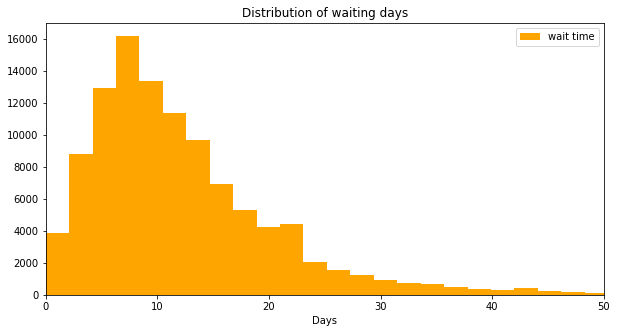

In [32]:
plt.figure(figsize = (10, 5))

plt.hist(data['wait_time'], bins = 100, color = 'orange', label = 'wait time')

plt.xlim(0, 50)
plt.title('Distribution of waiting days')
plt.xlabel('Days')
plt.legend()

plt.show()

### Explore Factors

In [33]:
daily_delivery = pd.DataFrame(data.set_index('delivered_date').resample('D').sum()['count'])

daily_delivery.loc[:, 'day_of_week'] = daily_delivery.index.dayofweek

In [34]:
daily_delivery

,count,day_of_week
delivered_date,,
2016-10-11,3,1
2016-10-12,0,2
2016-10-13,15,3
2016-10-14,17,4
2016-10-15,18,5
...,...,...
2018-10-13,0,5
2018-10-14,0,6
2018-10-15,0,0


In [35]:
daily_order = pd.DataFrame(data.set_index('order_date').resample('D').sum()['count'])

daily_order.loc[:, 'day_of_week'] = daily_order.index.dayofweek

In [36]:
daily_order

,count,day_of_week
order_date,,
2016-09-15,3,3
2016-09-16,0,4
2016-09-17,0,5
2016-09-18,0,6
2016-09-19,0,0
...,...,...
2018-08-25,71,5
2018-08-26,77,6
2018-08-27,68,0


In [37]:
import plotly.express as px

fig = px.scatter(daily_delivery, 
                 x=daily_delivery.index, 
                 y="count",
                 size = "count",
                 color = "day_of_week"
                )
fig.show()

In [38]:
import plotly.express as px

fig = px.scatter(daily_order, 
                 x=daily_order.index, 
                 y="count",
                 size = "count",
                 color = "day_of_week"
                )
fig.show()

### Feature Engineering

In [39]:
data.loc[:, 'order_day_of_week'] = data.order_date.dt.dayofweek

data.loc[:, 'order_month'] = data.order_date.dt.month

data.loc[:, 'year'] = data.order_date.dt.year

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
data

,order_id,order_date,delivered_date,customer_state,seller_state,product_volume_cm3,product_weight_g,wait_time,estimated_time_delivery,count,order_day_of_week,order_month,year
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02,2017-10-10,BANTEN,JAWA TENGAH,1976.0,500.0,8,2017-10-18,1,0,10,2017
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24,2018-08-07,JAMBI,JAWA TIMUR,4693.0,400.0,14,2018-08-13,1,1,7,2018
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08,2018-08-17,SUMATERA SELATAN,SULAWESI SELATAN,9576.0,420.0,9,2018-09-04,1,2,8,2018
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18,2017-12-02,SULAWESI SELATAN,BANTEN,6000.0,450.0,14,2017-12-15,1,5,11,2017
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13,2018-02-16,JAWA BARAT,JAWA BARAT,11475.0,250.0,3,2018-02-26,1,1,2,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107078,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06,2018-02-28,JAWA TIMUR,KALIMANTAN TENGAH,16000.0,4950.0,22,2018-03-02,1,1,2,2018
107079,83c1379a015df1e13d02aae0204711ab,2017-08-27,2017-09-21,KALIMANTAN TENGAH,BANTEN,63360.0,13300.0,25,2017-09-27,1,6,8,2017
107080,11c177c8e97725db2631073c19f07b62,2018-01-08,2018-01-25,JAWA BARAT,SULAWESI TENGAH,16000.0,13100.0,17,2018-02-15,1,0,1,2018
107081,11c177c8e97725db2631073c19f07b62,2018-01-08,2018-01-25,JAWA BARAT,SULAWESI TENGAH,16000.0,13100.0,17,2018-02-15,1,0,1,2018


### Baseline Score

Engineer a scoring metric that preserves the magnitude of the target and the direction of the errors made.

In [41]:
def directed_error(y, y_pred):
    return np.mean(y_pred - y)

y_base = (data['estimated_time_delivery'] - data['order_date']).dt.days

base_score = directed_error(data['wait_time'], y_base)

base_score

11.879840871099988

### Model Selection

In [42]:
X = data[['customer_state', 'seller_state', 'product_volume_cm3', 'product_weight_g', 'order_day_of_week', 'year', 'order_month']]

y = data['wait_time']

In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107083 entries, 0 to 107082
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_state      107083 non-null  object 
 1   seller_state        107083 non-null  object 
 2   product_volume_cm3  107083 non-null  float64
 3   product_weight_g    107083 non-null  float64
 4   order_day_of_week   107083 non-null  int64  
 5   year                107083 non-null  int64  
 6   order_month         107083 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 11.5+ MB


### Preprocessing Categorical Features

In [44]:
categorical_features = ['customer_state', 'seller_state', 
                        'year', 'order_month', 
                        'order_day_of_week']

X = pd.get_dummies(X, columns = categorical_features)

### Preprocessing Numerical Features

In [45]:
from sklearn.preprocessing import MinMaxScaler

numerical_features = ['product_volume_cm3', 'product_weight_g']

X.loc[:, numerical_features] = MinMaxScaler().fit_transform(X[numerical_features])

#### Copy the Data

In [46]:
data_copy = data.copy()

### Modelling

#### Linear Regression Using Cross Validation Prediction

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict

reg = LinearRegression()

y_reg_predcv = cross_val_predict(reg, X, y, cv=10)

In [48]:
print('Directed Error = ', directed_error(y, y_reg_predcv))

Directed Error =  0.0031657894136623284


In [49]:
predcv_reg = pd.Series(y_reg_predcv)

In [50]:
predcv_reg

0          7.620850
1         12.281982
2         12.313721
3         14.347656
4         15.415771
            ...    
107078    15.460938
107079    10.760742
107080    14.676270
107081    14.676025
107082    15.997559
Length: 107083, dtype: float64

In [51]:
data_reg_predcv = pd.merge(data_copy, predcv_reg.rename('new_wait_time'), how = 'inner', left_on = data_copy.index, right_on = predcv_reg.index)

In [52]:
data_reg_predcv['new_estimated_time_delivery'] = data_reg_predcv['order_date'] + pd.to_timedelta(data_reg_predcv['new_wait_time'], unit='d')

data_reg_predcv['delivery_time_difference'] = (data_reg_predcv['new_estimated_time_delivery'] - data_reg_predcv['delivered_date']).dt.days

In [53]:
data_reg_predcv['shipment_status'] = data_reg_predcv['delivery_time_difference'].apply(lambda x: 'EXTREMELY EARLY' if x >= 14 else ('EARLY' if x>= 7 else ('NORMAL' if x>= 0 else ('LATE' if x>= -7 else 'EXTREMELY LATE'))))

In [54]:
data_reg_predcv

,key_0,order_id,order_date,delivered_date,customer_state,seller_state,product_volume_cm3,product_weight_g,wait_time,estimated_time_delivery,count,order_day_of_week,order_month,year,new_wait_time,new_estimated_time_delivery,delivery_time_difference,shipment_status
0,0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02,2017-10-10,BANTEN,JAWA TENGAH,1976.0,500.0,8,2017-10-18,1,0,10,2017,7.620850,2017-10-09 14:54:01.406217600,-1,LATE
1,1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24,2018-08-07,JAMBI,JAWA TIMUR,4693.0,400.0,14,2018-08-13,1,1,7,2018,12.281982,2018-08-05 06:46:03.281260800,-2,LATE
2,2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08,2018-08-17,SUMATERA SELATAN,SULAWESI SELATAN,9576.0,420.0,9,2018-09-04,1,2,8,2018,12.313721,2018-08-20 07:31:45.468739200,3,NORMAL
3,3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18,2017-12-02,SULAWESI SELATAN,BANTEN,6000.0,450.0,14,2017-12-15,1,5,11,2017,14.347656,2017-12-02 08:20:37.500000000,0,NORMAL
4,4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13,2018-02-16,JAWA BARAT,JAWA BARAT,11475.0,250.0,3,2018-02-26,1,1,2,2018,15.415771,2018-02-28 09:58:42.656217600,12,EARLY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107078,107078,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06,2018-02-28,JAWA TIMUR,KALIMANTAN TENGAH,16000.0,4950.0,22,2018-03-02,1,1,2,2018,15.460938,2018-02-21 11:03:45.000000000,-7,LATE
107079,107079,83c1379a015df1e13d02aae0204711ab,2017-08-27,2017-09-21,KALIMANTAN TENGAH,BANTEN,63360.0,13300.0,25,2017-09-27,1,6,8,2017,10.760742,2017-09-06 18:15:28.125043200,-15,EXTREMELY LATE
107080,107080,11c177c8e97725db2631073c19f07b62,2018-01-08,2018-01-25,JAWA BARAT,SULAWESI TENGAH,16000.0,13100.0,17,2018-02-15,1,0,1,2018,14.676270,2018-01-22 16:13:49.687478400,-3,LATE
107081,107081,11c177c8e97725db2631073c19f07b62,2018-01-08,2018-01-25,JAWA BARAT,SULAWESI TENGAH,16000.0,13100.0,17,2018-02-15,1,0,1,2018,14.676025,2018-01-22 16:13:28.593782400,-3,LATE


In [106]:
import plotly.express as px

count_shipment_status = data_reg_predcv.groupby('shipment_status')['count'].sum().reset_index()

fig = px.bar(count_shipment_status, x='shipment_status', y='count')
fig.show()

#### Ridge Regression Using Cross Validation Prediction

In [57]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_predict

rng = Ridge()

y_rng_predcv = cross_val_predict(rng, X, y, cv=10)

In [58]:
print('Directed Error = ', directed_error(y, y_rng_predcv))

Directed Error =  0.0005377459398175368


In [59]:
predcv_rng = pd.Series(y_rng_predcv)

In [60]:
predcv_rng

0          7.623818
1         12.283418
2         12.313866
3         14.349405
4         15.416949
            ...    
107078    15.460486
107079    10.748455
107080    14.659747
107081    14.659747
107082    15.998212
Length: 107083, dtype: float64

In [61]:
data_rng_predcv = pd.merge(data_copy, predcv_rng.rename('new_wait_time'), how = 'inner', left_on = data_copy.index, right_on = predcv_rng.index)

In [62]:
data_rng_predcv['new_estimated_time_delivery'] = data_rng_predcv['order_date'] + pd.to_timedelta(data_rng_predcv['new_wait_time'], unit='d')

data_rng_predcv['delivery_time_difference'] = (data_rng_predcv['new_estimated_time_delivery'] - data_rng_predcv['delivered_date']).dt.days

In [63]:
data_rng_predcv['shipment_status'] = data_rng_predcv['delivery_time_difference'].apply(lambda x: 'EXTREMELY EARLY' if x >= 14 else ('EARLY' if x>= 7 else ('NORMAL' if x>= 0 else ('LATE' if x>= -7 else 'EXTREMELY LATE'))))

In [64]:
data_rng_predcv

,key_0,order_id,order_date,delivered_date,customer_state,seller_state,product_volume_cm3,product_weight_g,wait_time,estimated_time_delivery,count,order_day_of_week,order_month,year,new_wait_time,new_estimated_time_delivery,delivery_time_difference,shipment_status
0,0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02,2017-10-10,BANTEN,JAWA TENGAH,1976.0,500.0,8,2017-10-18,1,0,10,2017,7.623818,2017-10-09 14:58:17.856969600,-1,LATE
1,1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24,2018-08-07,JAMBI,JAWA TIMUR,4693.0,400.0,14,2018-08-13,1,1,7,2018,12.283418,2018-08-05 06:48:07.306214400,-2,LATE
2,2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08,2018-08-17,SUMATERA SELATAN,SULAWESI SELATAN,9576.0,420.0,9,2018-09-04,1,2,8,2018,12.313866,2018-08-20 07:31:58.010908800,3,NORMAL
3,3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18,2017-12-02,SULAWESI SELATAN,BANTEN,6000.0,450.0,14,2017-12-15,1,5,11,2017,14.349405,2017-12-02 08:23:08.578521600,0,NORMAL
4,4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13,2018-02-16,JAWA BARAT,JAWA BARAT,11475.0,250.0,3,2018-02-26,1,1,2,2018,15.416949,2018-02-28 10:00:24.425740800,12,EARLY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107078,107078,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06,2018-02-28,JAWA TIMUR,KALIMANTAN TENGAH,16000.0,4950.0,22,2018-03-02,1,1,2,2018,15.460486,2018-02-21 11:03:06.018134400,-7,LATE
107079,107079,83c1379a015df1e13d02aae0204711ab,2017-08-27,2017-09-21,KALIMANTAN TENGAH,BANTEN,63360.0,13300.0,25,2017-09-27,1,6,8,2017,10.748455,2017-09-06 17:57:46.519862400,-15,EXTREMELY LATE
107080,107080,11c177c8e97725db2631073c19f07b62,2018-01-08,2018-01-25,JAWA BARAT,SULAWESI TENGAH,16000.0,13100.0,17,2018-02-15,1,0,1,2018,14.659747,2018-01-22 15:50:02.110387200,-3,LATE
107081,107081,11c177c8e97725db2631073c19f07b62,2018-01-08,2018-01-25,JAWA BARAT,SULAWESI TENGAH,16000.0,13100.0,17,2018-02-15,1,0,1,2018,14.659747,2018-01-22 15:50:02.110387200,-3,LATE


In [107]:
import plotly.express as px

count_shipment_status = data_rng_predcv.groupby('shipment_status')['count'].sum().reset_index()

fig = px.bar(count_shipment_status, x='shipment_status', y='count')
fig.show()

#### Lasso Regression Using Cross Validation Prediction

In [67]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_predict

lsr = Lasso()

y_lsr_predcv = cross_val_predict(lsr, X, y, cv=10)

In [68]:
print('Directed Error = ', directed_error(y, y_lsr_predcv))

Directed Error =  9.715380220469766e-08


In [69]:
y_lsr_predcv

array([12.51522195, 12.51522195, 12.51522195, ..., 12.53039689,
       12.53039689, 12.53039689])

In [70]:
predcv_ls = pd.Series(y_lsr_predcv)

In [71]:
predcv_ls

0         12.515222
1         12.515222
2         12.515222
3         12.515222
4         12.515222
            ...    
107078    12.530397
107079    12.530397
107080    12.530397
107081    12.530397
107082    12.530397
Length: 107083, dtype: float64

In [72]:
data_lsr_predcv = pd.merge(data_copy, predcv_ls.rename('new_wait_time'), how = 'inner', left_on = data_copy.index, right_on = predcv_ls.index)

In [73]:
data_lsr_predcv['new_estimated_time_delivery'] = data_lsr_predcv['order_date'] + pd.to_timedelta(data_lsr_predcv['new_wait_time'], unit='d')

data_lsr_predcv['delivery_time_difference'] = (data_lsr_predcv['new_estimated_time_delivery'] - data_lsr_predcv['delivered_date']).dt.days

In [74]:
data_lsr_predcv['shipment_status'] = data_lsr_predcv['delivery_time_difference'].apply(lambda x: 'EXTREMELY EARLY' if x >= 14 else ('EARLY' if x>= 7 else ('NORMAL' if x>= 0 else ('LATE' if x>= -7 else 'EXTREMELY LATE'))))

In [75]:
data_lsr_predcv

,key_0,order_id,order_date,delivered_date,customer_state,seller_state,product_volume_cm3,product_weight_g,wait_time,estimated_time_delivery,count,order_day_of_week,order_month,year,new_wait_time,new_estimated_time_delivery,delivery_time_difference,shipment_status
0,0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02,2017-10-10,BANTEN,JAWA TENGAH,1976.0,500.0,8,2017-10-18,1,0,10,2017,12.515222,2017-10-14 12:21:55.176307200,4,NORMAL
1,1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24,2018-08-07,JAMBI,JAWA TIMUR,4693.0,400.0,14,2018-08-13,1,1,7,2018,12.515222,2018-08-05 12:21:55.176307200,-2,LATE
2,2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08,2018-08-17,SUMATERA SELATAN,SULAWESI SELATAN,9576.0,420.0,9,2018-09-04,1,2,8,2018,12.515222,2018-08-20 12:21:55.176307200,3,NORMAL
3,3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18,2017-12-02,SULAWESI SELATAN,BANTEN,6000.0,450.0,14,2017-12-15,1,5,11,2017,12.515222,2017-11-30 12:21:55.176307200,-2,LATE
4,4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13,2018-02-16,JAWA BARAT,JAWA BARAT,11475.0,250.0,3,2018-02-26,1,1,2,2018,12.515222,2018-02-25 12:21:55.176307200,9,EARLY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107078,107078,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06,2018-02-28,JAWA TIMUR,KALIMANTAN TENGAH,16000.0,4950.0,22,2018-03-02,1,1,2,2018,12.530397,2018-02-18 12:43:46.291036800,-10,EXTREMELY LATE
107079,107079,83c1379a015df1e13d02aae0204711ab,2017-08-27,2017-09-21,KALIMANTAN TENGAH,BANTEN,63360.0,13300.0,25,2017-09-27,1,6,8,2017,12.530397,2017-09-08 12:43:46.291036800,-13,EXTREMELY LATE
107080,107080,11c177c8e97725db2631073c19f07b62,2018-01-08,2018-01-25,JAWA BARAT,SULAWESI TENGAH,16000.0,13100.0,17,2018-02-15,1,0,1,2018,12.530397,2018-01-20 12:43:46.291036800,-5,LATE
107081,107081,11c177c8e97725db2631073c19f07b62,2018-01-08,2018-01-25,JAWA BARAT,SULAWESI TENGAH,16000.0,13100.0,17,2018-02-15,1,0,1,2018,12.530397,2018-01-20 12:43:46.291036800,-5,LATE


In [108]:
import plotly.express as px

count_shipment_status = data_lsr_predcv.groupby('shipment_status')['count'].sum().reset_index()

fig = px.bar(count_shipment_status, x='shipment_status', y='count')
fig.show()

#### Elastic Net Using Cross Validation Prediction

In [78]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_predict

enr = ElasticNet()

y_enr_predcv = cross_val_predict(enr, X, y, cv=10)

In [79]:
print('Directed Error = ', directed_error(y, y_enr_predcv))

Directed Error =  6.658209179889073e-06


In [80]:
y_enr_predcv

array([12.24474011, 12.58900531, 12.58900531, ..., 12.60335439,
       12.60335439, 12.60335439])

In [81]:
predcv_enr = pd.Series(y_enr_predcv)

In [82]:
predcv_enr

0         12.244740
1         12.589005
2         12.589005
3         12.589005
4         12.589005
            ...    
107078    12.603354
107079    12.603354
107080    12.603354
107081    12.603354
107082    12.603354
Length: 107083, dtype: float64

In [83]:
data_enr_predcv = pd.merge(data_copy, predcv_enr.rename('new_wait_time'), how = 'inner', left_on = data_copy.index, right_on = predcv_enr.index)

In [84]:
data_enr_predcv['new_estimated_time_delivery'] = data_enr_predcv['order_date'] + pd.to_timedelta(data_enr_predcv['new_wait_time'], unit='d')

data_enr_predcv['delivery_time_difference'] = (data_enr_predcv['new_estimated_time_delivery'] - data_enr_predcv['delivered_date']).dt.days

In [85]:
data_enr_predcv['shipment_status'] = data_enr_predcv['delivery_time_difference'].apply(lambda x: 'EXTREMELY EARLY' if x >= 14 else ('EARLY' if x>= 7 else ('NORMAL' if x>= 0 else ('LATE' if x>= -7 else 'EXTREMELY LATE'))))

In [86]:
data_enr_predcv

,key_0,order_id,order_date,delivered_date,customer_state,seller_state,product_volume_cm3,product_weight_g,wait_time,estimated_time_delivery,count,order_day_of_week,order_month,year,new_wait_time,new_estimated_time_delivery,delivery_time_difference,shipment_status
0,0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02,2017-10-10,BANTEN,JAWA TENGAH,1976.0,500.0,8,2017-10-18,1,0,10,2017,12.244740,2017-10-14 05:52:25.545676800,4,NORMAL
1,1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24,2018-08-07,JAMBI,JAWA TIMUR,4693.0,400.0,14,2018-08-13,1,1,7,2018,12.589005,2018-08-05 14:08:10.058697600,-2,LATE
2,2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08,2018-08-17,SUMATERA SELATAN,SULAWESI SELATAN,9576.0,420.0,9,2018-09-04,1,2,8,2018,12.589005,2018-08-20 14:08:10.058697600,3,NORMAL
3,3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18,2017-12-02,SULAWESI SELATAN,BANTEN,6000.0,450.0,14,2017-12-15,1,5,11,2017,12.589005,2017-11-30 14:08:10.058697600,-2,LATE
4,4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13,2018-02-16,JAWA BARAT,JAWA BARAT,11475.0,250.0,3,2018-02-26,1,1,2,2018,12.589005,2018-02-25 14:08:10.058697600,9,EARLY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107078,107078,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06,2018-02-28,JAWA TIMUR,KALIMANTAN TENGAH,16000.0,4950.0,22,2018-03-02,1,1,2,2018,12.603354,2018-02-18 14:28:49.819123200,-10,EXTREMELY LATE
107079,107079,83c1379a015df1e13d02aae0204711ab,2017-08-27,2017-09-21,KALIMANTAN TENGAH,BANTEN,63360.0,13300.0,25,2017-09-27,1,6,8,2017,12.603354,2017-09-08 14:28:49.819123200,-13,EXTREMELY LATE
107080,107080,11c177c8e97725db2631073c19f07b62,2018-01-08,2018-01-25,JAWA BARAT,SULAWESI TENGAH,16000.0,13100.0,17,2018-02-15,1,0,1,2018,12.603354,2018-01-20 14:28:49.819123200,-5,LATE
107081,107081,11c177c8e97725db2631073c19f07b62,2018-01-08,2018-01-25,JAWA BARAT,SULAWESI TENGAH,16000.0,13100.0,17,2018-02-15,1,0,1,2018,12.603354,2018-01-20 14:28:49.819123200,-5,LATE


In [109]:
import plotly.express as px

count_shipment_status = data_enr_predcv.groupby('shipment_status')['count'].sum().reset_index()

fig = px.bar(count_shipment_status, x='shipment_status', y='count')
fig.show()

### KNeighbors Regressor Using Cross Validation Prediction

In [89]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_predict

knr = KNeighborsRegressor(n_neighbors = 3)

y_knr_predcv = cross_val_predict(knr, X, y, cv=10)

In [90]:
print('Directed Error = ', directed_error(y, y_knr_predcv))

Directed Error =  -0.23110110848593926


In [91]:
y_knr_predcv

array([ 8.33333333, 19.66666667,  7.        , ..., 13.66666667,
       13.66666667, 19.33333333])

In [92]:
predcv_knr = pd.Series(y_knr_predcv)

In [93]:
predcv_knr

0          8.333333
1         19.666667
2          7.000000
3          9.666667
4         10.333333
            ...    
107078     9.666667
107079     8.666667
107080    13.666667
107081    13.666667
107082    19.333333
Length: 107083, dtype: float64

In [94]:
data_knr_predcv = pd.merge(data_copy, predcv_knr.rename('new_wait_time'), how = 'inner', left_on = data_copy.index, right_on = predcv_knr.index)

In [95]:
data_knr_predcv['new_estimated_time_delivery'] = data_knr_predcv['order_date'] + pd.to_timedelta(data_knr_predcv['new_wait_time'], unit='d')

data_knr_predcv['delivery_time_difference'] = (data_knr_predcv['new_estimated_time_delivery'] - data_knr_predcv['delivered_date']).dt.days

In [96]:
data_knr_predcv['shipment_status'] = data_knr_predcv['delivery_time_difference'].apply(lambda x: 'EXTREMELY EARLY' if x >= 14 else ('EARLY' if x>= 7 else ('NORMAL' if x>= 0 else ('LATE' if x>= -7 else 'EXTREMELY LATE'))))

In [97]:
data_knr_predcv

,key_0,order_id,order_date,delivered_date,customer_state,seller_state,product_volume_cm3,product_weight_g,wait_time,estimated_time_delivery,count,order_day_of_week,order_month,year,new_wait_time,new_estimated_time_delivery,delivery_time_difference,shipment_status
0,0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02,2017-10-10,BANTEN,JAWA TENGAH,1976.0,500.0,8,2017-10-18,1,0,10,2017,8.333333,2017-10-10 07:59:59.999971200,0,NORMAL
1,1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24,2018-08-07,JAMBI,JAWA TIMUR,4693.0,400.0,14,2018-08-13,1,1,7,2018,19.666667,2018-08-12 16:00:00.000028800,5,NORMAL
2,2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08,2018-08-17,SUMATERA SELATAN,SULAWESI SELATAN,9576.0,420.0,9,2018-09-04,1,2,8,2018,7.000000,2018-08-15 00:00:00.000000000,-2,LATE
3,3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18,2017-12-02,SULAWESI SELATAN,BANTEN,6000.0,450.0,14,2017-12-15,1,5,11,2017,9.666667,2017-11-27 16:00:00.000028800,-5,LATE
4,4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13,2018-02-16,JAWA BARAT,JAWA BARAT,11475.0,250.0,3,2018-02-26,1,1,2,2018,10.333333,2018-02-23 07:59:59.999971200,7,EARLY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107078,107078,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06,2018-02-28,JAWA TIMUR,KALIMANTAN TENGAH,16000.0,4950.0,22,2018-03-02,1,1,2,2018,9.666667,2018-02-15 16:00:00.000028800,-13,EXTREMELY LATE
107079,107079,83c1379a015df1e13d02aae0204711ab,2017-08-27,2017-09-21,KALIMANTAN TENGAH,BANTEN,63360.0,13300.0,25,2017-09-27,1,6,8,2017,8.666667,2017-09-04 16:00:00.000028800,-17,EXTREMELY LATE
107080,107080,11c177c8e97725db2631073c19f07b62,2018-01-08,2018-01-25,JAWA BARAT,SULAWESI TENGAH,16000.0,13100.0,17,2018-02-15,1,0,1,2018,13.666667,2018-01-21 16:00:00.000028800,-4,LATE
107081,107081,11c177c8e97725db2631073c19f07b62,2018-01-08,2018-01-25,JAWA BARAT,SULAWESI TENGAH,16000.0,13100.0,17,2018-02-15,1,0,1,2018,13.666667,2018-01-21 16:00:00.000028800,-4,LATE


In [110]:
import plotly.express as px

count_shipment_status = data_knr_predcv.groupby('shipment_status')['count'].sum().reset_index()

fig = px.bar(count_shipment_status, x='shipment_status', y='count')
fig.show()

## Discussion

From the model, we can recap the result in tabel below:

Model                  | Total Late     | Directed Error 
-----------------------|----------------|------------------
Linear Regression      | 41304          | 0.0031657894136623284
Ridge Regression       | 41340          | 0.0005377459398175368
Lasso Regression       | 40622          | 9.715380220469766e-08
Elastic Net            | 40622          | 6.658209179889073e-06
KNeighbors Regressor   | 47696          | -0.23110110848593926

The model that has the least total late orders are lasso regression and elastic net. But we have not tried to do hyperparameter tuning.
